In [1]:
import pandas as pd
import geopandas as gpd
from os import listdir
from os.path import isfile, join
import pathlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# file paths and names
path_input = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Totals/'
name_input_file = 'cropland-total.csv'

path_output = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/Cropland/'
name_output_file = 'Perc_Cropland_Flooded.csv'


In [3]:
total = pd.read_csv(path_input+name_input_file, header=0)

colnames = []
for col in total.columns:
    colnames.append(col)

total = total.dropna(subset=[colnames[1]])
total = total[[colnames[1], colnames[5], colnames[6]]]
total = total.rename(columns={colnames[1]: "Region",
                              colnames[5]: "Flooded",
                              colnames[6]: "Total"})

total['Perc_Flooded'] = list(total['Flooded']/total['Total'])

total = total.fillna(0)

total = total.replace([np.inf, -np.inf], np.nan)

total = total.drop(columns=['Total', 'Flooded'])
total = total.sort_values(by=['Perc_Flooded'])

total


,Region,Perc_Flooded
215,Kadjebi,0.0
207,Bia West,0.0
208,Jaman South,0.0
209,Abura / Asebu / Kwamankese,0.0
214,Cape Coast Metro,0.0
...,...,...
149,La Dade Kotopon,NaN
169,Komenda Edna Eguafo / Abirem,NaN
175,Jasikan,NaN
197,Ga Central Municipal,NaN


In [4]:
# save file to disk

total.to_csv(path_output+name_output_file, index = False, header=True)


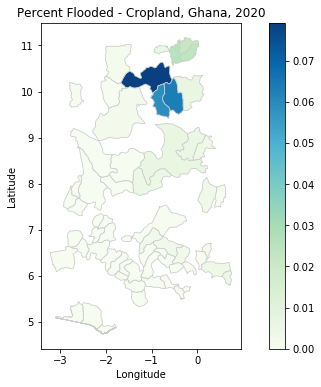

In [5]:
# map using geopandas

shp_path = '/Users/srilakshmi/Desktop/Thesis/Data/District-level/Districts-Shapefile/gadm36_GHA_2.shp'
ghana_dist = gpd.read_file(shp_path)

merged = ghana_dist.set_index('NAME_2').join(total.set_index('Region'))
merged.index.name = 'NAME_2'
merged.reset_index(inplace=True)

merged = merged.sort_values(by=['Perc_Flooded'], ascending=False)
merged
# set a variable that will call whatever column we want to visualise on the map
variable = 'Perc_Flooded'
colorscale = 'GnBu'

# set the range for the choropleth
vmin, vmax = min(merged[variable]), max(merged[variable])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap=colorscale, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('Percent Flooded - Cropland, Ghana, 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=colorscale, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

plt.show()


In [6]:
# write to shapefile
path_output = '/Users/srilakshmi/Desktop/Thesis/Treatment-Control-Assignment/Perc-Flooded-NRT/Cropland/perc_cropland_flooded_shp/'
name_output_file = 'perc_cropland_flooded.shp'
merged.to_file(path_output+name_output_file)
